## Using Python to retrieve data from a DAAC's OPeNDAP server

OPeNDAP is a lightweight protocol used by earth scientists to retrieve data. Most commonly OPeNDAP servers are viewed with a regular web browser.

We can import OPeNDAP data into Python using one library: `netCDF4`. 

In [1]:
import netCDF4

Using these libraries we can import data files like they were any other file on the internet- we just need to know the correct URL. Here, as an example, we'll use a SMAP dataset from NSIDC. Using NSIDC's OPeNDAP browser (http://n5eil01u.ecs.nsidc.org/opendap/) we can find a specific file we'd like to retrieve.

Here, I've chosen `SMAP_L3_SM_P_20150520_R13080_001`.

When you've clicked on the file's name, you'll be brought to a "Dataset Access Form" page. Copy the url from the "Dataset URL" field.

Dataset URL: http://n5eil01u.ecs.nsidc.org:80/opendap/SMAP/SPL3SMP.003/2015.05.20/SMAP_L3_SM_P_20150520_R13080_001.h5

Let's create a Python variable to hold this url. It's a long URL, so we'll break it into a few parts, for readabilty.

In [2]:
dataset_url = ("http://n5eil01u.ecs.nsidc.org:80/opendap/SMAP/SPL3SMP.003/"
               "2015.05.20/SMAP_L3_SM_P_20150520_R13080_001.h5")

Now, all we have to do is to pass the url to `netCDF4` and it will ingest the data.

In [3]:
dataset = netCDF4.Dataset(dataset_url)
for var in dataset.variables:
    print(var)

Soil_Moisture_Retrieval_Data_static_water_body_fraction
Soil_Moisture_Retrieval_Data_boresight_incidence
Soil_Moisture_Retrieval_Data_tb_time_utc
Soil_Moisture_Retrieval_Data_vegetation_opacity
Soil_Moisture_Retrieval_Data_tb_qual_flag_h
Soil_Moisture_Retrieval_Data_roughness_coefficient
Soil_Moisture_Retrieval_Data_landcover_class
Soil_Moisture_Retrieval_Data_EASE_row_index
Soil_Moisture_Retrieval_Data_tb_v_corrected
Soil_Moisture_Retrieval_Data_tb_4_corrected
Soil_Moisture_Retrieval_Data_longitude_centroid
Soil_Moisture_Retrieval_Data_landcover_class_fraction
Soil_Moisture_Retrieval_Data_retrieval_qual_flag
Soil_Moisture_Retrieval_Data_vegetation_water_content
Soil_Moisture_Retrieval_Data_soil_moisture
Soil_Moisture_Retrieval_Data_tb_3_corrected
Soil_Moisture_Retrieval_Data_tb_qual_flag_3
Soil_Moisture_Retrieval_Data_tb_qual_flag_4
Soil_Moisture_Retrieval_Data_tb_h_corrected
Soil_Moisture_Retrieval_Data_albedo
Soil_Moisture_Retrieval_Data_tb_time_seconds
Soil_Moisture_Retrieval_Data_

We can now access the dataset's variables using bracket notation.

In [6]:
lat = dataset.variables["Soil_Moisture_Retrieval_Data_latitude"][:,:]
lon = dataset.variables["Soil_Moisture_Retrieval_Data_longitude"][:,:]
mos = dataset.variables["Soil_Moisture_Retrieval_Data_soil_moisture"][:,:]
mos

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = -9999.0)

Do whatever you want with the data.

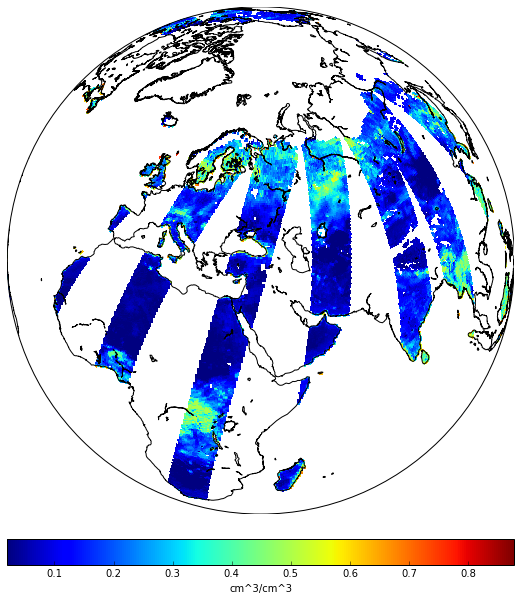

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

def show_vars(dataset):
    for var in dataset.variables:
        print(var)

plt.figure(figsize=(10,10))
b = Basemap(projection='ortho',lon_0=40,lat_0=40,resolution='l')
b.drawcoastlines()
cs = b.pcolor(lon, lat, mos, latlon=True)
cbar = b.colorbar(cs, location='bottom', pad='5%')
cbar.set_label("cm^3/cm^3")

### We can do the same with any other OPeNDAP datasets.

Here's one from LP DAAC- http://opendap.cr.usgs.gov/opendap/hyrax/MCD12C1.051/MCD12C1.051.ncml


In [11]:
lp_dataset_url = ("http://opendap.cr.usgs.gov/opendap/hyrax/"
               "MCD12C1.051/MCD12C1.051.ncml")
lp_dataset = netCDF4.Dataset(lp_dataset_url)
show_vars(lp_dataset)

Latitude
Longitude
Majority_Land_Cover_Type_1_Assessment
Majority_Land_Cover_Type_3
Land_Cover_Type_1_Percent
Num_LAI_FPAR_Classes
Majority_Land_Cover_Type_2_Assessment
Majority_Land_Cover_Type_1
Land_Cover_Type_2_Percent
Num_UMD_Classes
Majority_Land_Cover_Type_1_QC
Land_Cover_Type_3_Percent
Majority_Land_Cover_Type_3_Assessment
Majority_Land_Cover_Type_2
Num_IGBP_Classes
time


Here's one from ASDC DAAC- http://l0dup05.larc.nasa.gov/opendap/MOPITT/MOP02J.005/2002.03.02/MOP02J-20020302-L2V10.1.3.beta.hdf

In [12]:
asdc_dataset_url = ("http://l0dup05.larc.nasa.gov/opendap/MOPITT/MOP02J.005"
                    "/2002.03.02/MOP02J-20020302-L2V10.1.3.beta.hdf")
asdc_dataset = netCDF4.Dataset(asdc_dataset_url)
show_vars(asdc_dataset)

Seconds_in_Day
Pressure_Grid
Solar_Zenith_Angle
Satellite_Zenith_Angle
Surface_Pressure
Retrieved_Surface_Temperature
Retrieved_Surface_Emissivity
Retrieved_CO_Mixing_Ratio_Profile
Retrieved_CO_Surface_Mixing_Ratio
Retrieved_CO_Total_Column
Retrieved_CO_Total_Column_Diagnostics
Retrieval_Averaging_Kernel_Matrix
Retrieval_Error_Covariance_Matrix
A_Priori_Surface_Temperature
A_Priori_Surface_Emissivity
A_Priori_CO_Mixing_Ratio_Profile
A_Priori_CO_Surface_Mixing_Ratio
Level_1_Radiances_and_Errors
Degrees_of_Freedom_for_Signal
Surface_Index
DEM_Altitude
Cloud_Description
MODIS_Cloud_Diagnostics
Water_Vapor_Climatology_Content
Retrieval_Iterations
Information_Content_Index
Signal_Chi2
Swath_Index
Time
Latitude
Longitude
nprs2_d
ntwo_d
nthree_d
ncldd_d
nres_d


Here's a dataset from GHRC DAAC- https://ghrc.nsstc.nasa.gov:443/opendap/ssmi/f13/weekly/data/2005/f13_ssmi_20050212v7_wk.nc

In [13]:
ghrc_dataset_url = ("https://ghrc.nsstc.nasa.gov:443/opendap/ssmi/f13/weekly/data/"
                    "2005/f13_ssmi_20050212v7_wk.nc")
ghrc_dataset = netCDF4.Dataset(ghrc_dataset_url)
show_vars(ghrc_dataset)

latitude
longitude
wind_speed
atmosphere_water_vapor_content
atmosphere_cloud_liquid_water_content
rainfall_rate


We can actually do a pretty simple visualization with this dataset.

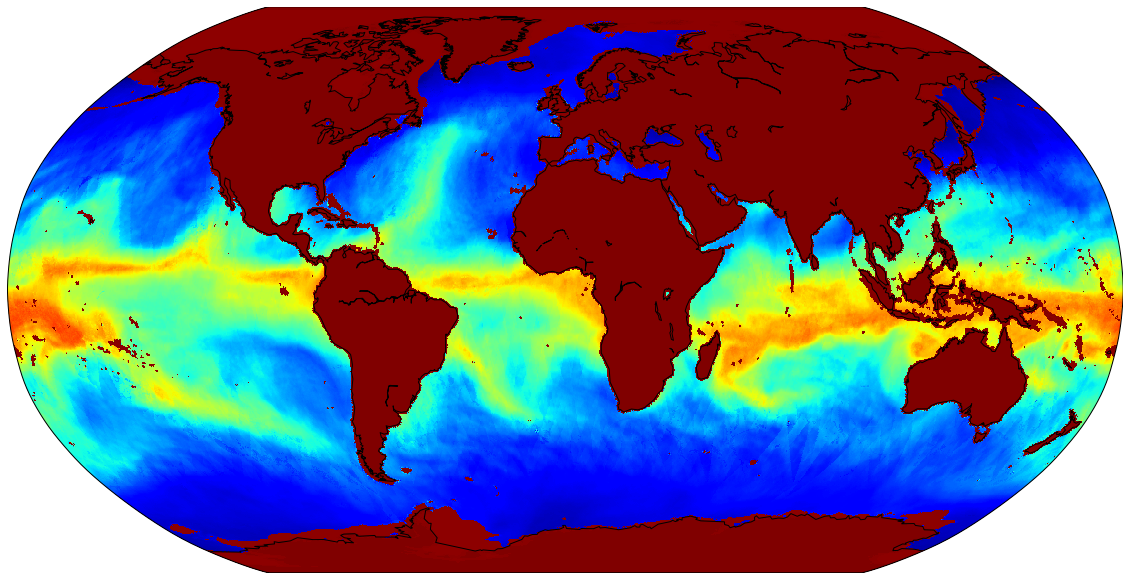

In [14]:
ghrc_wvc = ghrc_dataset["atmosphere_water_vapor_content"][:,:]
ghrc_lats = ghrc_dataset["latitude"][:]
ghrc_lons = ghrc_dataset["longitude"][:]
conv_lats, conv_lons = np.meshgrid(ghrc_lons, ghrc_lats)

plt.figure(figsize=(20,20))
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
m.pcolormesh(conv_lats, conv_lons, ghrc_wvc, latlon=True)

Here's a random dataset from ORNL - http://thredds.daac.ornl.gov/thredds/dodsC/ornldaac/720/a785mfd.nc4

In [15]:
ornl_dataset_url = ("http://thredds.daac.ornl.gov/thredds/"
                    "dodsC/ornldaac/720/a785mfd.nc4")
ornl_dataset = netCDF4.Dataset(ornl_dataset_url)
show_vars(ornl_dataset)

PARA0515
PARA0515FLAG
PARA0517
PARA0517FLAG
PARA0520
PARA0520FLAG
PARA0529
PARA0529FLAG
PARA0560
PARA0560FLAG
PARA0561
PARA0561FLAG
PARA0568
PARA0568FLAG
PARA0572
PARA0572FLAG
PARA0574
PARA0574FLAG
PARA0575
PARA0575FLAG
PARA0576
PARA0576FLAG
PARA0578
PARA0578FLAG
PARA0580
PARA0580FLAG
PARA0581
PARA0581FLAG
PARA0582
PARA0582FLAG
PARA0642
PARA0642FLAG
PARA0643
PARA0643FLAG
PARA0648
PARA0648FLAG
PARA0649
PARA0649FLAG
PARA0714
PARA0714FLAG
PARA0715
PARA0715FLAG
PARA0716
PARA0716FLAG
PARA0723
PARA0723FLAG
PARA0735
PARA0735FLAG
PARA0736
PARA0736FLAG
PARA0760
PARA0760FLAG
PARA0761
PARA0761FLAG
PARA0762
PARA0762FLAG
PARA0763
PARA0763FLAG
PARA0764
PARA0764FLAG
PARA0765
PARA0765FLAG
PARA0766
PARA0766FLAG
PARA0767
PARA0767FLAG
PARA0768
PARA0768FLAG
PARA0769
PARA0769FLAG
PARA1019
PARA1019FLAG
PARA1020
PARA1020FLAG
PARA1021
PARA1021FLAG
PARA1022
PARA1022FLAG
PARA1023
PARA1023FLAG
PARA1024
PARA1024FLAG
PARA1201
PARA1201FLAG
PARA1202
PARA1202FLAG
PARA1203
PARA1203FLAG
PARA1204
PARA1204FLAG
PARA1221
P

And one from PO DAAC - http://opendap.jpl.nasa.gov:80/opendap/SeaIce/nscat/L17/v2/S19/S1702054.HDF.Z

In [16]:
po_dataset_url = ("http://opendap.jpl.nasa.gov:80/opendap/SeaIce/"
                  "nscat/L17/v2/S19/S1702054.HDF.Z")
po_dataset = netCDF4.Dataset(po_dataset_url)
show_vars(po_dataset)

NSCAT_Rev_17_WVC_Lat
NSCAT_Rev_17_WVC_Lon
NSCAT_Rev_17_Num_Sigma0
NSCAT_Rev_17_Num_Good_Sigma0
NSCAT_Rev_17_Num_Beam_12
NSCAT_Rev_17_Num_Beam_34
NSCAT_Rev_17_Num_Beam_56
NSCAT_Rev_17_Num_Beam_78
NSCAT_Rev_17_WVC_Quality_Flag
NSCAT_Rev_17_Cen_Lat
NSCAT_Rev_17_Cen_Lon
NSCAT_Rev_17_Cell_Azimuth
NSCAT_Rev_17_Incidence_Angle
NSCAT_Rev_17_Sigma0
NSCAT_Rev_17_Coeff_A
NSCAT_Rev_17_Coeff_B
NSCAT_Rev_17_Coeff_C
NSCAT_Rev_17_Sigma0_Quality_Flag
NSCAT_Rev_17_K_Polar
NSCAT_Rev_17_Sigma0_Usable_Flag_1
NSCAT_Rev_17_Sigma0_Usable_Flag_2
NSCAT_Rev_17_Sigma0_Usable_Flag_3
NSCAT_Rev_17_Surface_Flag
NSCAT_Rev_17_Mean_Atmos_Atten
vdata_NSCAT_Rev_17_SwathIndex_vdf_begin
vdata_NSCAT_Rev_17_NSCAT_L17_vdf_Mean_Time
vdata_NSCAT_Rev_17_NSCAT_L17_vdf_L17_Quality_Flags


I couldn't find OPeNDAP servers for other DAACs :(